In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from scipy import stats
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Load the Titanic dataset
titanic_df = pd.read_csv(filepath_or_buffer=r"data\Titanic\tested.csv")

# Display basic information about the dataset
print(titanic_df.info())
print(titanic_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.48162

In [51]:
# Central Tendency
mean_age = titanic_df['Age'].mean()
median_age = titanic_df['Age'].median()
mode_age = titanic_df['Age'].mode()[0]
mean_fare = titanic_df['Fare'].mean()
median_fare = titanic_df['Fare'].median()
mode_fare = titanic_df['Fare'].mode()[0]

print(f"Mean Age: {mean_age}, Median Age: {median_age}, Mode Age: {mode_age}")
print(f"Mean Fare: {mean_fare}, Median Fare: {median_fare}, Mode Fare: {mode_fare}")

Mean Age: 30.272590361445783, Median Age: 27.0, Mode Age: 21.0
Mean Fare: 35.627188489208635, Median Fare: 14.4542, Mode Fare: 7.75


Skewness of Age: 0.4573612871503845
Skewness of Fare: 3.6872133081121405


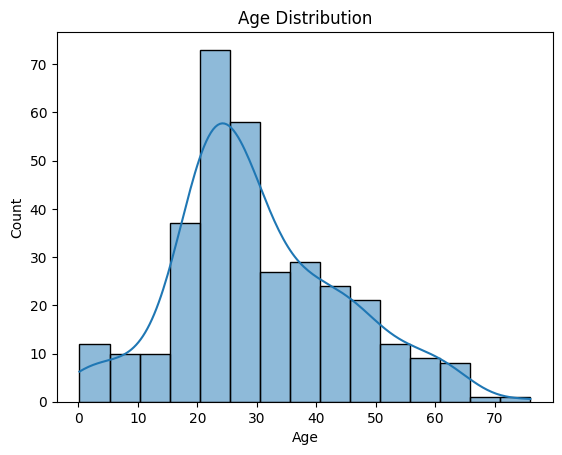

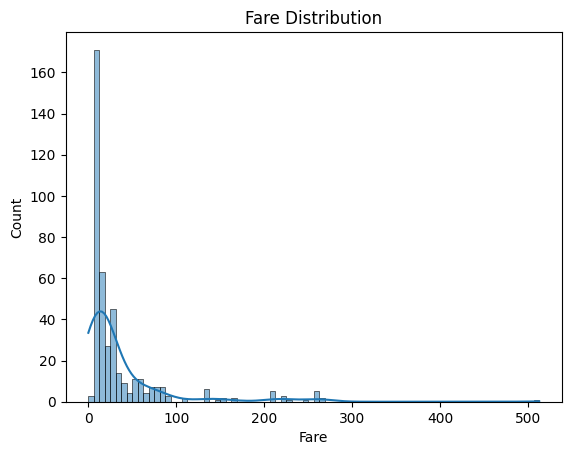

In [52]:
# Skewness and Normal Distribution
print(f"Skewness of Age: {titanic_df['Age'].skew()}")
print(f"Skewness of Fare: {titanic_df['Fare'].skew()}")

sns.histplot(titanic_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(titanic_df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

In [53]:
# Probability Basics
survival_prob = titanic_df['Survived'].mean()
print(f"Overall survival probability: {survival_prob}")

Overall survival probability: 0.36363636363636365


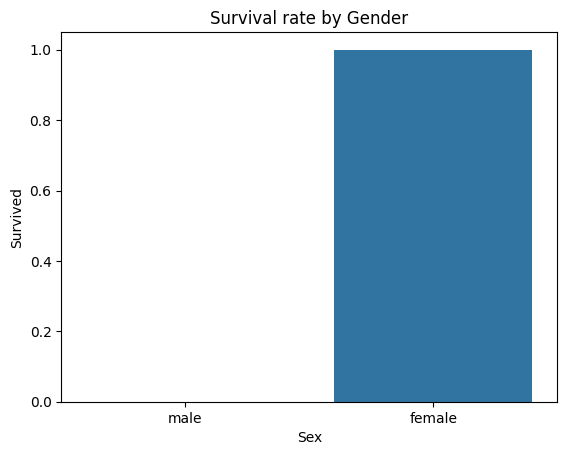

In [55]:
#Survival by Gender
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title("Survival rate by Gender")
plt.show()

In [12]:
# Odds Ratio: Survival by Gender
odds_male = titanic_df[titanic_df['Sex'] == 'male']['Survived'].mean() / (1 - titanic_df[titanic_df['Sex'] == 'male']['Survived'].mean())
odds_female = titanic_df[titanic_df['Sex'] == 'female']['Survived'].mean() / (1 - titanic_df[titanic_df['Sex'] == 'female']['Survived'].mean())
odds_ratio = odds_female / odds_male

print(f"Odds Ratio (Female vs Male): {odds_ratio}")

Odds Ratio (Female vs Male): inf


In [13]:
# Standard Deviation
std_age = titanic_df['Age'].std()
std_fare = titanic_df['Fare'].std()
print(f"Standard Deviation of Age: {std_age}, Standard Deviation of Fare: {std_fare}")

Standard Deviation of Age: 14.181209235624422, Standard Deviation of Fare: 55.907576179973844


In [14]:
# Bias-Variance Trade off (using simple linear regression)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data by taking a subset of features
X = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].fillna(titanic_df[['Age', 'Fare']].mean())
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2300447137795064


In [21]:
# Distance Metrics
from sklearn.metrics import pairwise_distances

# Calculate Euclidean and Manhattan distances
dist_euclidean = pairwise_distances(X, metric='euclidean')
dist_manhattan = pairwise_distances(X, metric='cityblock')

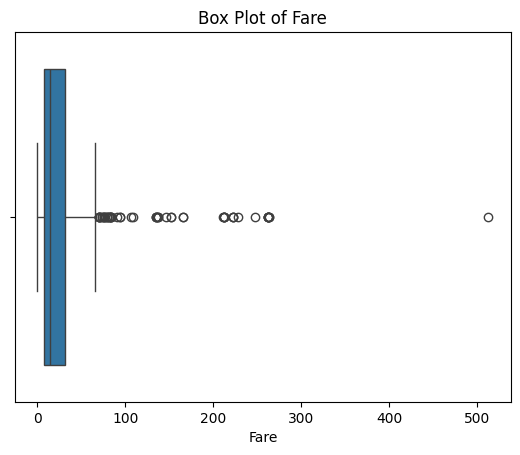

In [16]:
# Outlier Analysis
# Box plot for Fare
sns.boxplot(x=titanic_df['Fare'])
plt.title('Box Plot of Fare')
plt.show()

In [30]:
# Identify outliers using IQR
Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = titanic_df[(titanic_df['Fare'] < (Q1 - 1.5 * IQR)) | (titanic_df['Fare'] > (Q3 + 1.5 * IQR))]

print(f"Number of outliers in Fare: {len(outliers)}")

Number of outliers in Fare: 55


In [36]:
# Missing Value Treatment
missing_age = titanic_df['Age'].isnull().sum()
print(f"Missing values in Age: {missing_age}")

# Central Imputation for Age
age_imputer = SimpleImputer(strategy='mean')
titanic_df['Age'] = age_imputer.fit_transform(titanic_df[['Age']])

# KNN Imputation for Age
knn_imputer = KNNImputer(n_neighbors=5)
titanic_df[['Age', 'Fare']] = knn_imputer.fit_transform(titanic_df[['Age', 'Fare']])

# Dummification of Categorical Variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

Missing values in Age: 86


In [39]:
# Correlation Analysis
correlation_matrix = titanic_df.loc[:,  ~titanic_df.columns.isin(['Name', 'Ticket','Cabin'])].corr()
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.023245 -0.026751 -0.030874  0.003818  0.043080   
Survived       -0.023245  1.000000 -0.108615 -0.000011  0.099943  0.159120   
Pclass         -0.026751 -0.108615  1.000000 -0.440782  0.001087  0.018721   
Age            -0.030874 -0.000011 -0.440782  1.000000 -0.079535 -0.045073   
SibSp           0.003818  0.099943  0.001087 -0.079535  1.000000  0.306895   
Parch           0.043080  0.159120  0.018721 -0.045073  0.306895  1.000000   
Fare            0.006333  0.187774 -0.571291  0.335195  0.168957  0.227671   
Sex_male        0.023245 -1.000000  0.108615  0.000011 -0.099943 -0.159120   
Embarked_Q     -0.035731  0.115574  0.252608 -0.012719 -0.098824 -0.132948   
Embarked_S      0.048008 -0.105883  0.120783 -0.136822  0.079367  0.092201   

                 Fare  Sex_male  Embarked_Q  Embarked_S  
PassengerId  0.006333  0.023245   -0.035731    0.048008  
Survived     0.187774 -1.

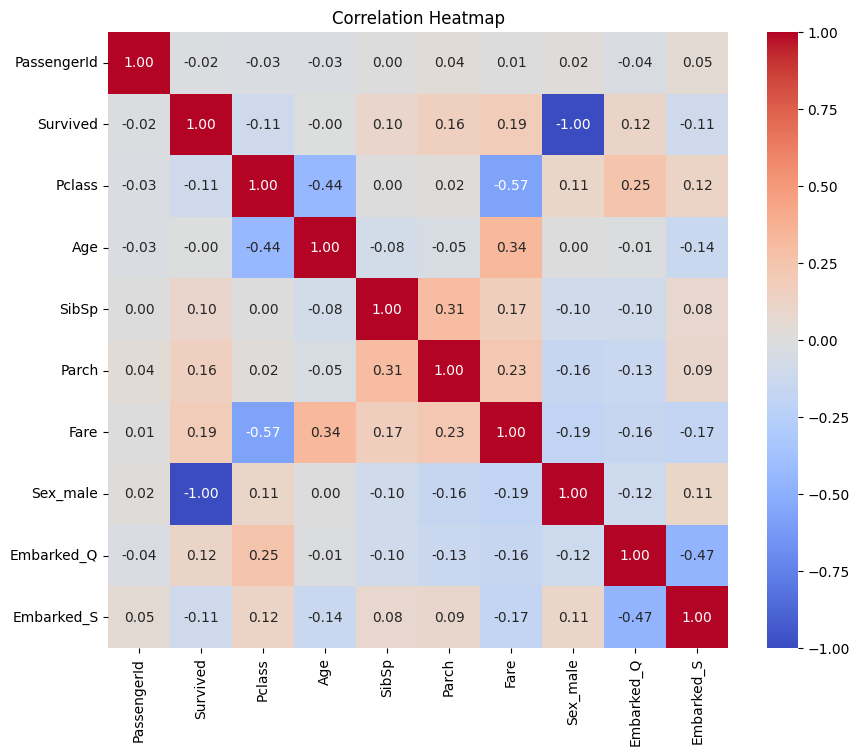

In [41]:
# Heatmap for Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
# Pearson correlation
pearson_corr = titanic_df[['Age', 'Fare', 'Survived']].corr(method='pearson')
print("Pearson Correlation:\n", pearson_corr)

Pearson Correlation:
                Age      Fare  Survived
Age       1.000000  0.335195 -0.000011
Fare      0.335195  1.000000  0.187774
Survived -0.000011  0.187774  1.000000


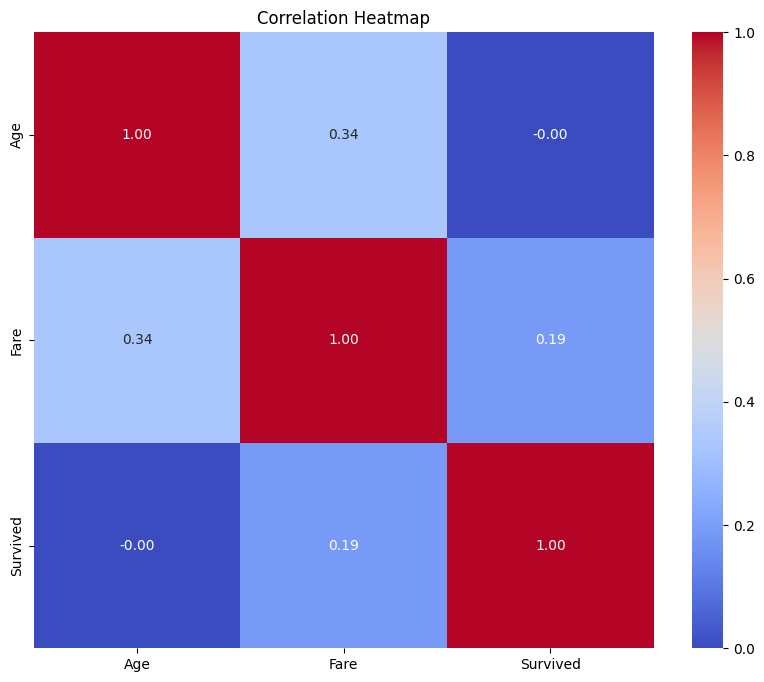

In [42]:
# Heatmap for Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

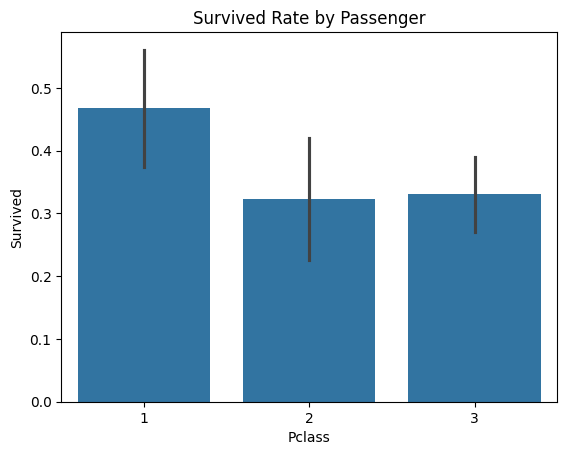

In [47]:
# Survial by Passenger:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title("Survived Rate by Passenger")
plt.show()

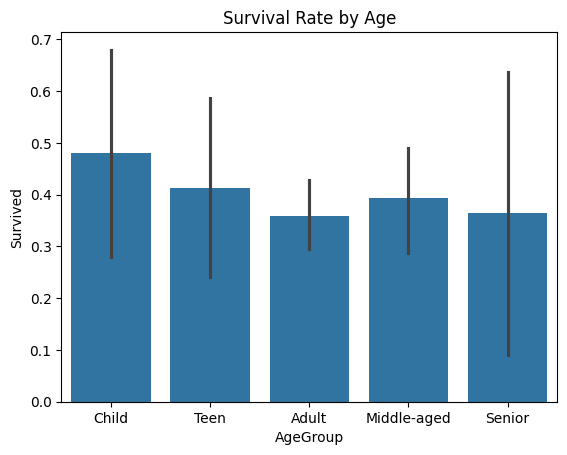

In [56]:
# Survival by Age_Group
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])

sns.barplot(x= "AgeGroup", y="Survived", data=titanic_df)
plt.title("Survival Rate by Age")
plt.show()

In [65]:
# Create the interactive plot using Plotly
fig = px.histogram(titanic_df, x="Pclass", color="AgeGroup", barmode="group",
                   title="AgeGroup Distribution by Class",
                   labels={"Pclass": "Passenger Class", "AgeGroup": "Age Group"},
                   category_orders={"AgeGroup": ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']})
fig.show()

NameError: name 'px' is not defined

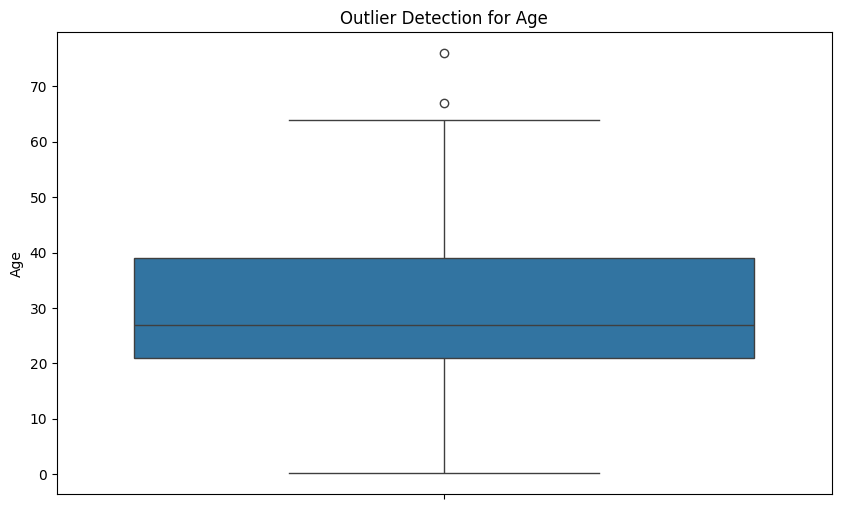

In [58]:
# Outlier Detection:
plt.figure(figsize=(10,6))
sns.boxplot(data=titanic_df['Age'])
plt.title("Outlier Detection for Age")
plt.show()

In [62]:
# Counting categorical values
df_categ = titanic_df.groupby(['Pclass', 'Sex', 'Embarked']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
df_categ

,Pclass,Sex,Embarked,Count
15,3,male,S,101
9,2,male,S,52
12,3,female,S,41
4,1,male,S,29
0,1,female,C,28
3,1,male,C,28
13,3,male,C,27
6,2,female,S,26
11,3,female,Q,23
2,1,female,S,21


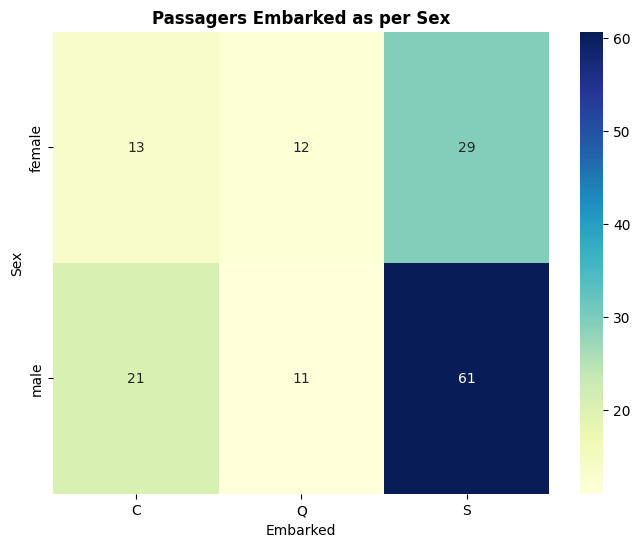

In [63]:
# Gráfico de mapa de calor
pivot_df = df_categ.pivot_table(index="Sex", columns="Embarked", values="Count", fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Passagers Embarked as per Sex", fontweight='bold')
plt.xlabel("Embarked")
plt.ylabel("Sex")
plt.show()

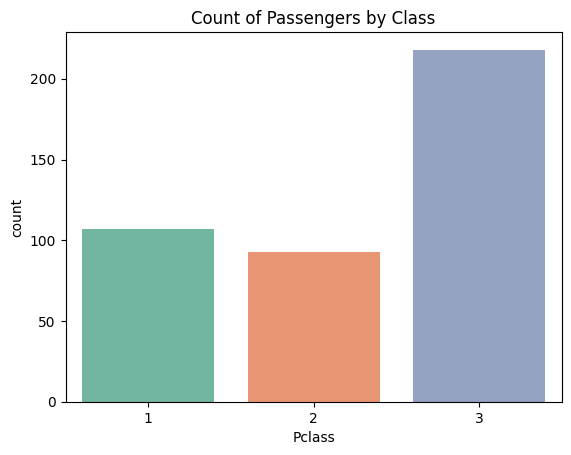

In [64]:
sns.countplot(x='Pclass', data=titanic_df, palette='Set2')
plt.title('Count of Passengers by Class')
plt.show()